In [43]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data_green = pd.read_parquet('green_tripdata_2024-01.parquet')

In [36]:
data_green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,0.0,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,0.0,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,0.0,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,0.0,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN


In [37]:
mean_green = data_green['total_amount'].mean()
distance_green = data_green['trip_distance'].max()
tipam_green = data_green['tip_amount'].mean()

print(f"El promedio de los ingresos brutos de los taxis verdes fue de: {mean_green:.2f} dólares. \n"
      f"La mayor distancia recorrida de un taxi verde fue: {distance_green:.2f} units. \n"
      f"El promedio de las propinas hacia los taxis verdes fue de: {tipam_green:.2f} dólares. \n")

El promedio de los ingresos brutos de los taxis verdes fue de: 22.40 dólares. 
La mayor distancia recorrida de un taxi verde fue: 201421.68 units. 
El promedio de las propinas hacia los taxis verdes fue de: 2.26 dólares. 



In [38]:
data_yellow = pd.read_parquet('yellow_tripdata_2024-01.parquet')

In [31]:
data_yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [33]:
mean_yellow = data_yellow['total_amount'].mean()
distance_yellow = data_yellow['trip_distance'].max()
tipam_yellow = data_yellow['tip_amount'].mean()

print(f"El promedio de los ingresos brutos de los taxis amarillos fue de: {mean_yellow:.2f} dólares. \n"
      f"La mayor distancia recorrida de un taxi amarillo fue: {distance_yellow:.2f} units. \n"
      f"El promedio de las propinas hacia los taxis amarillos fue de: {tipam_yellow:.2f} dólares. \n")

El promedio de los ingresos brutos de los taxis amarillos fue de: 26.80 dólares. 
La mayor distancia recorrida de un taxi amarillo fue: 312722.30 units. 
El promedio de las propinas hacia los taxis amarillos fue de: 3.34 dólares. 



In [44]:
tollsam_green = np.round(data_green['tolls_amount'].sum(), 2)
tollsam_yellow = np.round(data_yellow['tolls_amount'].sum(), 2)

In [45]:
print(tollsam_green, tollsam_yellow)

10812.65 1562419.71


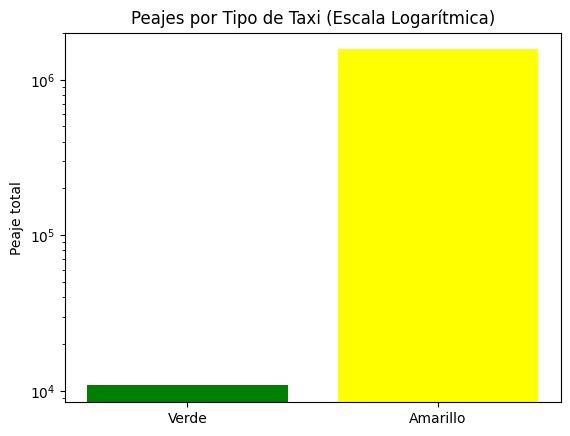

In [53]:
%matplotlib inline 
# Nombres de las barras
taxi_types = ['Verde', 'Amarillo']
# Valores correspondientes
tolls_amounts = [tollsam_green, tollsam_yellow]

# Crear la gráfica de barras
plt.bar(taxi_types, tolls_amounts, color=['green', 'yellow'])


plt.yscale('log') 
plt.title('Peajes por Tipo de Taxi (Escala Logarítmica)')
plt.ylabel('Peaje total')
plt.show()

In [58]:
# Convertir a datetime y extraer hora y día de la semana
data_green['lpep_pickup_datetime'] = pd.to_datetime(data_green['lpep_pickup_datetime'])
data_green['hora'] = data_green['lpep_pickup_datetime'].dt.hour  # Hora (0-23)
data_green['dia_semana'] = data_green['lpep_pickup_datetime'].dt.dayofweek  # Día (0:Lunes, 6:Domingo)

In [59]:
heatmap_data = data.groupby(['dia_semana', 'hora']).size().unstack().fillna(0)

# Opcional: Ordenar días de Lunes (0) a Domingo (6) y horas de 0 a 23
heatmap_data = heatmap_data.reindex(range(7), axis=0)  # Días completos
heatmap_data = heatmap_data.reindex(range(24), axis=1)  # Horas completas

KeyError: 'dia_semana'

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(
    heatmap_data,
    cmap='hot',
    aspect='auto',  # Ajuste automático de aspecto
    interpolation='nearest'
)

# Personalizar ejes
plt.colorbar(label='Número de viajes')
plt.xticks(ticks=range(24)), labels=range(24))
plt.yticks(ticks=range(7)), labels=dias)
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.title('Mapa de Calor: Viajes por Hora y Día')
plt.show()